In [1]:
import nltk
import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics.pairwise import linear_kernel
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from mpl_toolkits.axes_grid1.inset_locator import mark_inset, inset_axes
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from sklearn import datasets
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

from nltk.tokenize import word_tokenize, wordpunct_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = WordNetLemmatizer()
stemmer = nltk.stem.porter.PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Reading the data

In [2]:

#Reading the train and test data file to convert them in to data frame.
train_data = pd.read_table('train_new.txt',header=None,skiprows=0,names=['sentiment','review'])
test_data = pd.read_table('test_new.txt',header=None,skiprows=0,names=['review'])

# drop missing text labels in train to reduce noise
train_data = train_data.dropna()
test_data = test_data.dropna()

#remove small words
train_data['review'] = train_data['review'].apply(lambda x: ' '.join([word for word in x.split() if (len(word)>3)]))

#Printing some data to check how does it look
print("train data size: ",train_data.shape)
print("test data size: ",test_data.shape)

print(train_data['review'].iloc[1])
print(train_data.sentiment.value_counts())


train data size:  (14998, 2)
test data size:  (15000, 1)
excellent thriller from Turkey which make sense.Great from Gokbakar brothers.<br /><br />First all,i want point screen play.Generally screen play most films from Turkey enough,but best shots said "perfect".And also transition parts really excellent.<br /><br />On other hand,"Gen" great topic that influence everyone.Especially,a woman ,who wants psyciatrist sanitarium ,has mother that habitual insanity.Principal causes psychological consequences given Gen.The only thing have combine hints.<br /><br />There impressive aggression part Doga Rutkay Sahan Gokbakar played.This performance more realistic than Irréversible(Monica Bellucci) ".<br /><br />The last thing want "Watch this movie,you'll confused"
-1    7499
 1    7499
Name: sentiment, dtype: int64


Preprocessing the data

In [3]:
train_data_processed = []
#removing stopping words doing stemming on train data.
for i in range(0, len(train_data)):
    train_data['review'].iloc[i] = train_data['review'].iloc[i].replace("<br />"," ")
    review = re.sub('[^a-zA-Z]', ' ', train_data['review'].iloc[i])
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in set(review) if not word in set(stopwords)]
    review = ' '.join(review)
    train_data_processed.append(review)
test_data_processed = []
#removing stopping words doing lemmatization on test data.
for i in range(0, len(test_data)):
    test_data['review'].iloc[i] = test_data['review'].iloc[i].replace("<br />"," ")
    review = re.sub('[^a-zA-Z]', ' ', test_data['review'].iloc[i])
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in set(review) if not word in set(stopwords)]
    review = ' '.join(review)
    test_data_processed.append(review)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [4]:
#checking the length and some sample data
type(train_data_processed)
print(len(train_data_processed))
print(len(test_data_processed))
print(train_data_processed[2])
print(train_data['sentiment'][2])
print(train_data_processed[:2])

14998
15000
uncut throughout snippet adolf part understood version much mean kind barbara befriends portrayal eternal calculating came notice fall even singing pretense also fourteen touted applicable approach literate past modern germany carnal hitching nothing make unlikely man result sexually conveys side away reason philosophy distant little considered beyond raw make face release note st star tinged sleep powerful lily least understand chico especially death first permanent exterior restored along drift lose explicit destination played begin sexuality said better exists interpretation literally lonely highly time behavior show although melody toward stanwyck easy actress tie course year difficult nuance tat word semi baby attempting wagon year ride congress nietzsche cutest many mush exploit used apropos cold degree time serf wisely surface know necessary convincing called source control released handy would watch hitler amount four materialism intention possible good friedrich ni

Vectorizing - TFIDF

In [5]:
#tf idf and creating unigram, bigram and 3 gram for better precision #assignment
tf_idf = TfidfVectorizer(ngram_range=(1, 3))
#applying tf idf to training data
X_train_tf = tf_idf.fit_transform(train_data_processed)
#applying tf idf to training data
X_test_tf = tf_idf.transform(test_data_processed)

In [6]:
#printing features/attributes
tf_idf.get_feature_names_out()
print(X_train_tf.shape)

(14998, 2026243)


Plotting most used words

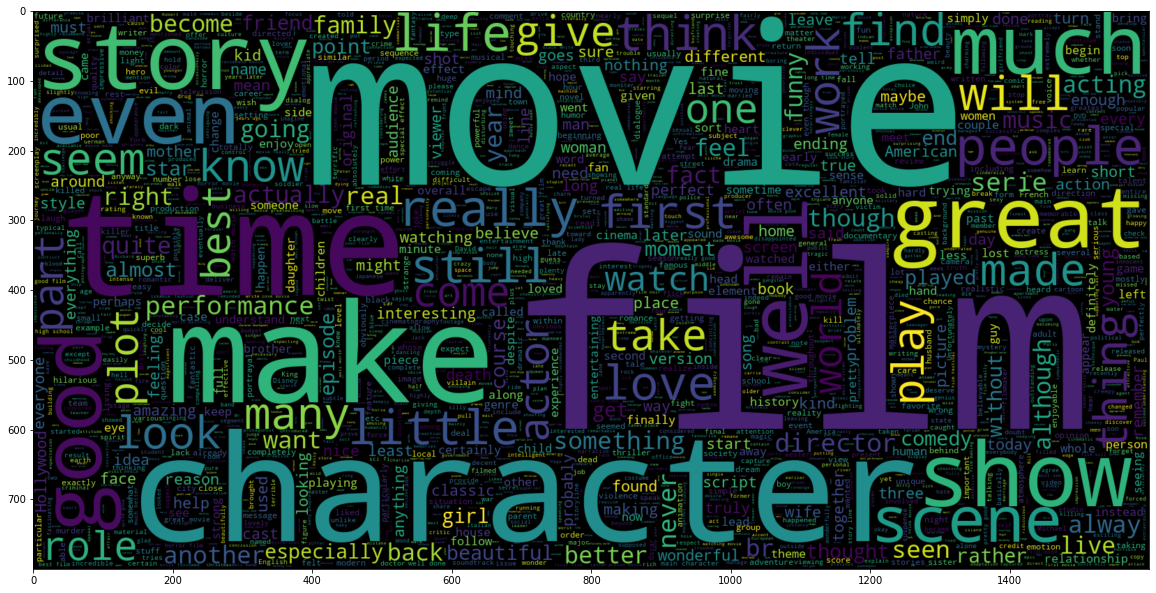

In [ ]:
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(train_data[train_data.sentiment == 1].review))
plt.imshow(wc , interpolation = 'bilinear')

In [ ]:
# #print(X_train_tf[0])
# print("n_samples: %d, n_features: %d" % X_train_tf.shape)

# X_train, X_test, y_train, y_test = train_test_split(X_train_tf,train_data['sentiment'],random_state=1, test_size= 0.2)
# #df = pd.DataFrame(X_train_tf.T.toarray(), index=feature_names, columns=corpus_index)
# #print(df)
# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

Feature selection using Chi square.

In [7]:
#assignment
ch2a = SelectKBest(chi2,k = 40000)
X_train_y_assn = ch2a.fit_transform(X_train_tf, train_data['sentiment'])
X_test_y_assn = ch2a.transform(X_test_tf)

Cosin similarity

In [8]:
cosine_sim = cosine_similarity(X_test_y_assn, X_train_y_assn)

In [10]:
def kNN_manual(k, X_test, X_train, y_train):

    """
    implementation of k nearest neighbor algorithm using cosine similarity
        
    k: an integer paramter for nearest neighbours (usually odd)
    
    X_test: sparse matrix for testing or to make predictions
    
    X_train: sparse matrix to train the model
    
    test_file: must be shape (int,)
    contains the preprocessed text for the kNN method to classify
    
    train_label: must be shape (int,)
    contains the labels from the training set
    """

    test_label = list()
    count = 1
    #looping over all the test file to get cos similarity on each document
    print(X_test.shape[0])
    for i in cosine_sim:
        #cosin similarity
        
        #sorting on arguments and extracting k nearest neighbours
        indices = np.argsort(-i)[:k]
        indices
        #count += 1
        #print(count)

        #getting those neighbours(labels) from training set
        nearest_neigh = []
        for j in indices:
            #print(y_train.iloc[j])
            nearest_neigh.append(y_train.iloc[j])

        #adding the labels of all the neighbours
        sum_labels = sum(nearest_neigh)

        #print(sum_labels)

        #classifying based on which label was most among that set
        if sum_labels > 0:
          test_label.append('+1')
        else:
          test_label.append('-1')
        test_label
        
    return test_label

to_submit = kNN_manual(475, X_test_y_assn, X_train_y_assn, train_data['sentiment'])

15000


Creating a .txt file about the test data output

In [11]:
print(to_submit)
#to_submit = list(map(int, to_submit))
np.savetxt(r'format.txt', to_submit, fmt='%s')

['+1', '+1', '+1', '-1', '+1', '-1', '-1', '+1', '-1', '-1', '+1', '-1', '-1', '+1', '-1', '+1', '-1', '-1', '+1', '+1', '-1', '-1', '-1', '+1', '-1', '-1', '+1', '-1', '-1', '-1', '+1', '+1', '+1', '+1', '-1', '+1', '+1', '+1', '-1', '+1', '+1', '-1', '+1', '+1', '+1', '+1', '+1', '-1', '+1', '-1', '-1', '+1', '+1', '+1', '-1', '+1', '-1', '-1', '-1', '+1', '-1', '-1', '+1', '+1', '-1', '-1', '-1', '+1', '+1', '-1', '+1', '-1', '-1', '-1', '-1', '+1', '-1', '+1', '+1', '+1', '+1', '+1', '+1', '+1', '+1', '+1', '+1', '-1', '-1', '+1', '+1', '-1', '+1', '-1', '-1', '+1', '-1', '-1', '+1', '+1', '+1', '+1', '-1', '-1', '+1', '-1', '+1', '-1', '+1', '+1', '+1', '+1', '-1', '-1', '-1', '+1', '-1', '-1', '+1', '+1', '-1', '-1', '+1', '-1', '-1', '+1', '-1', '+1', '+1', '+1', '-1', '-1', '+1', '-1', '-1', '-1', '+1', '-1', '+1', '+1', '-1', '+1', '-1', '-1', '+1', '-1', '-1', '+1', '-1', '-1', '-1', '+1', '-1', '-1', '+1', '-1', '-1', '+1', '-1', '+1', '-1', '-1', '-1', '-1', '+1', '-1', '+1

If we want to check the accuracy of our train data splitting in test data. Optional

In [ ]:
to_submit = list(map(int, to_submit))
print('Accuracy Score: ',i,' - ',metrics.accuracy_score(y_test,to_submit)*100,'%',sep='')

Accuracy Score: 5 - 85.5%


This loop I used to calculate the best K value to get the highest accuracy and plot some diagram.

In [ ]:
accuracies = []

for i in range(1,300):
    to_submit = kNN_manual(i, X_test, X_train, y_test, y_train)
    to_submit = list(map(int, to_submit))
    accuracies.append(metrics.accuracy_score(y_test,to_submit)*100)

# Plot the results 

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(range(1,100), accuracies)
ax.set_xlabel('# of Nearest Neighbors (k)')
ax.set_ylabel('Accuracy (%)');